# **Missing Values in Titanic DataSet**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Dataset Link** : https://www.kaggle.com/c/titanic/data

#### Read the data in a pandas dataframe called titanic_df and understand their characteristics. Use "columns", "describe" and try to understand data with kaggle description








1.   **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  ** Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.   **Name:** Name of passenger
4.  ** Sex: **Sex of the passenger
5.  ** Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.   **Ticket:** Ticket number of the passenger
9.   **Fare: **Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)









df.describe() method gives statistical information about numerical columns of the dataset

### Use 2 different methods to understand the number of non-null counts per column
df.info tells us about column datatypes, non-null counts and memory consumption. Use another one.

## Three columns have missing values : Age, Cabin and Embarked.
Calculate the percentage of null values for numeric columns

## Cabin Column

In [0]:
### Calculate the percentage of null values for cabin column

### Over 77% values in this column are missing. Which do you think is the best approach for this column?

# Embarked Column

In [0]:
### Embarked is a categorical column. Find wich values takes this variable

In [0]:
### Count the numbers for each value and calculate the percentage for the higher value

In [0]:
### Which do you think is the best approach in this case?

# Age Column

In [0]:
### Calculate the percentage of null values for cabin column

In [0]:
### Plot an histogram with the distribution of the age column

### Build a dataframe with Age and Sex columns

### Use a lambda function to  atribute the mean of the age per sex to the values to the null values

### Plot an histogram with the distribution of the column with the new values. Do you think is a good approach?

### Use a lambda function to  atribute the median of the age per sex to the values to the null values

### Plot an histogram with the distribution of the column with the new values. Do you think is a good approach?

# **Dealing with Outliers. Detecting Outliers**

## Import the libraries


In [35]:

#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris
from scipy import stats



# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data


In [9]:
boston= load_boston()

x = boston.data
y = boston.target

print (boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## find features name


In [13]:
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Understand the dataset

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create dataframe


In [18]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df_o = boston_df

boston_df.shape

(506, 13)

In [27]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Oulier detection - Univarite - Boxplot of 'DIS'



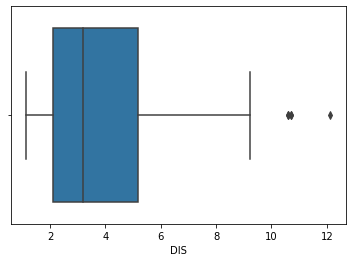

In [21]:
sns.boxplot(boston_df['DIS']);

## Check the correlation between features before multivariate outlier analysis and plot a heatmap


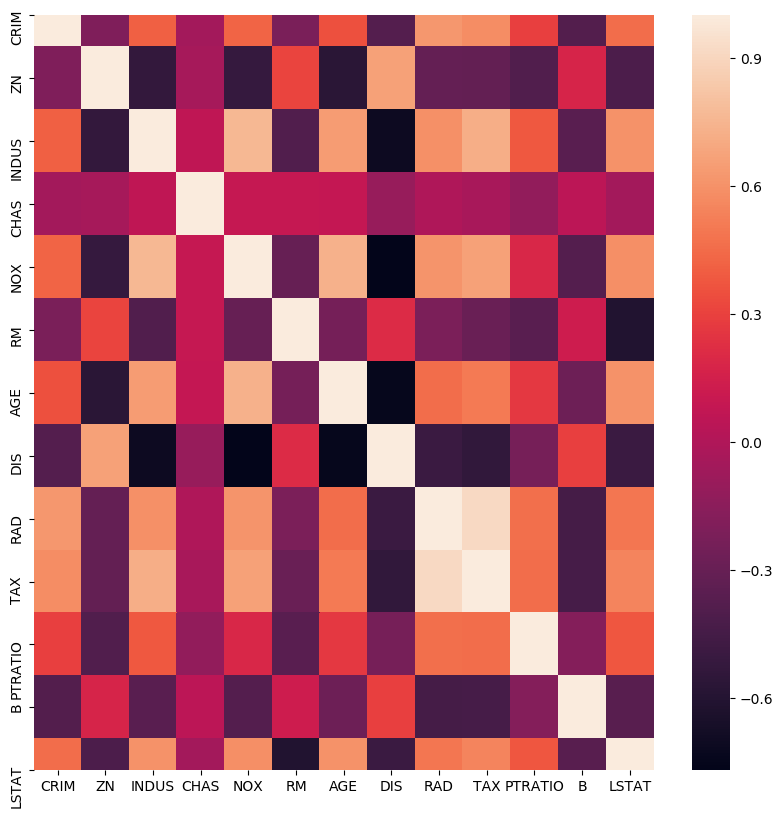

In [23]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(boston_df.corr());

In [24]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## Multivariate outlier analysis  - 'INDUS' and 'TAX' scatterplot

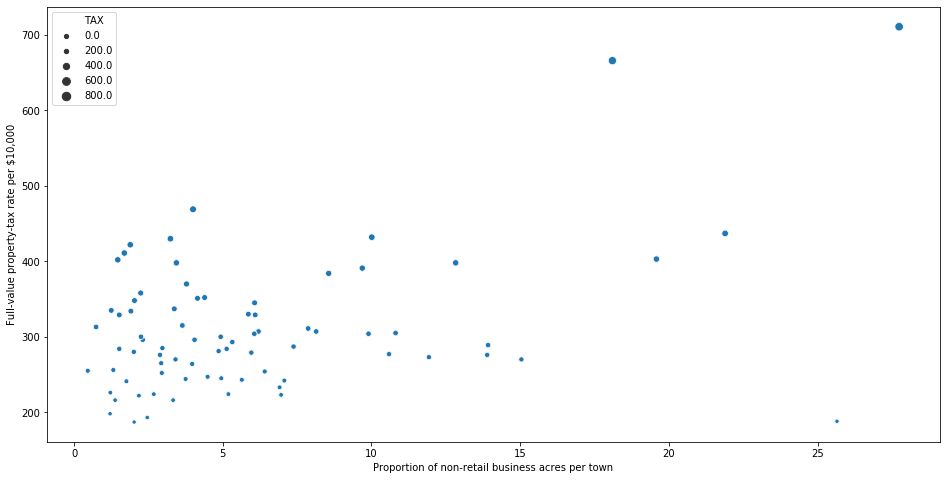

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(boston_df['INDUS'], boston_df['TAX'], size = boston_df['TAX'], data=boston_df)
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()


## Analysis of z values for the dataframe

In [37]:
z = np.abs(stats.zscore(boston_df))
print(f'z-shape: {z.shape}', "\n", z)

z-shape: (506, 13) 
 [[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


## Stablish a threshold of 3 for the z values and print where z is bigger than that threshold

In [39]:
# Using np.where to locate those values over the 99.sth of the data
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [43]:
# print(boston_df[np.where(z > 3)])
print(z[55][1])

3.375038763517309


# Removing Outliers 

# Remove outliers using z-values

In [44]:
# parece que hemos hecho una copia del df para algo. Esto se carga los outliers y deja los datos originales intactos
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

## Calculate the shape of the original dataframe, and the new dataframe without outliers

In [45]:
boston_df.shape, boston_df_o.shape

((506, 13), (415, 13))

# Remove outliers using IQR approach

In [46]:
# Otra manera de hacerlo
boston_df_o1 = boston_df

In [47]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


## Calculate the shape of the dataframe without outliers

In [52]:
boston_df.shape, boston_df_o1.shape, boston_df_out.shape

((506, 13), (506, 13), (274, 13))

In [54]:
# Este último método ha sido más radical, ha cortado más por lo sano
boston_df_o.shape, boston_df.shape, boston_df_out.shape

((415, 13), (506, 13), (274, 13))